In [1]:
import sys
sys.path.append('scripts')
from Retrosynthesis import init_LocalRetro, retrosnythesis
import torch

Using backend: pytorch
/home/shuanchen/anaconda3/envs/rdenv/lib/python3.6/site-packages/dgl/base.py:45: DGLWarning: Detected an old version of PyTorch. Suggest using torch>=1.5.0 for the best experience.
  return warnings.warn(message, category=category, stacklevel=1)


In [2]:
'''
Preatrained model can be found in github release:
https://github.com/kaist-amsg/LocalRetro/releases/tag/data

Load the model and necessary files for prediction decoding
'''
dataset = 'USPTO_MIT'
device = torch.device('cuda:0')
model_path = 'models/%s.pth' % dataset
config_path = 'data/configs/default_config.json'
data_dir = 'data/%s' % dataset

args = {'data_dir': data_dir, 'model_path': model_path, 'config_path': config_path, 'device': device, 'mode': 'test', 'GRA': True}
model, graph_function, atom_templates, bond_templates, smarts2E, smarts2H = init_LocalRetro(args)

Parameters of loaded LocalRetro model:
{'attention_heads': 8, 'attention_layers': 1, 'batch_size': 16, 'edge_hidden_feats': 64, 'node_out_feats': 320, 'num_step_message_passing': 6, 'AtomTemplate_n': 3124, 'BondTemplate_n': 19174, 'in_node_feats': 27, 'in_edge_feats': 13, 'GRA': True}


In [3]:
target_smiles = {'Lenalidomide': 'O=C1NC(=O)CCC1N3C(=O)c2cccc(c2C3)N',
                 'Salmeterol': 'OCc1cc(ccc1O)[C@H](O)CNCCCCCCOCCCCc2ccccc2',
                 '5-HT6 receptor ligand': 'O=S(=O)(Nc4cc2CCC1(CCC1)Oc2c(N3CCNCC3)c4)c5ccccc5F', 
                 'DDR1_037': 'O=C(Nc4cccc(C(=O)N3CCN(c1ccnc2[nH]ccc12)C3)c4)c5cccc(C(F)(F)F)c5',
                 'DDR1_032': 'Cc3cc2[nH]c(c1cc(CN(C)C)cc(C(F)(F)F)c1)nc2cc3C#Cc4cncnc4'}

In [4]:
top_k = 10
smiles = 'O=C1NC(=O)CCC1N3C(=O)c2cccc(c2C3)N'
results = retrosnythesis(smiles, model, graph_function, device, atom_templates, bond_templates, smarts2E, smarts2H, top_k = top_k)

,SMILES,Local reaction template,Score,Molecule
0,O=C1NC(=O)CCC1N3C(=O)c2cccc(c2C3)N,None,NaN,
1,O=C1CCC(N2Cc3c(cccc3[N+](=O)[O-])C2=O)C(=O)N1,[N;+0:1]>>O=[N;+1:1]-[O-] at 18,0.979457,
2,COC(=O)CCC(C(N)=O)N1Cc2c(N)cccc2C1=O,[C;+0:1]-[N;+0:2]>>C-O-[C;+0:1].[N;+0:2] at [3...,0.004520,
3,COC(=O)C(CCC(N)=O)N1Cc2c(N)cccc2C1=O,[C;+0:1]-[N;+0:2]>>C-O-[C;+0:1].[N;+0:2] at [1...,0.003235,
4,CC(O)CCC(C(N)=O)N1Cc2c(N)cccc2C1=O,[O;+0:1]=[C;+0:2]-[N;+0:3]>>C-[O;+0:1]-[C;+0:2...,0.002959,
5,NC(=O)CCC(C(=O)O)N1Cc2c(N)cccc2C1=O,[O;+0:2]=[C;+0:1]-[N;+0:3]>>O=[C;+0:1]-[O;+0:2...,0.001891,
6,CC(C)(C)OC(=O)Nc1cccc2c1CN(C1CCC(=O)NC1=O)C2=O,[N;+0:1]>>C-C(-C)(-C)-O-C(=O)-[N;+0:1] at 18,0.000944,
7,CC(O)C(CCC(N)=O)N1Cc2c(N)cccc2C1=O,[O;+0:1]=[C;+0:2]-[N;+0:3]>>C-[O;+0:1]-[C;+0:2...,0.000868,
8,NC(=O)C(CCC(=O)O)N1Cc2c(N)cccc2C1=O,[O;+0:2]=[C;+0:1]-[N;+0:3]>>O=[C;+0:1]-[O;+0:2...,0.000866,

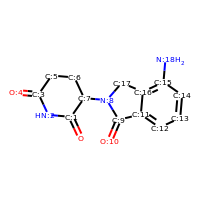
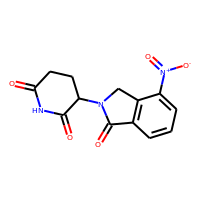
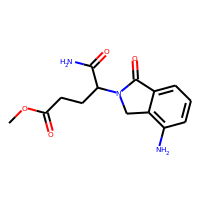
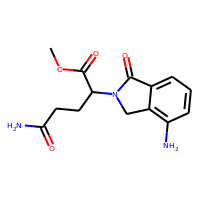
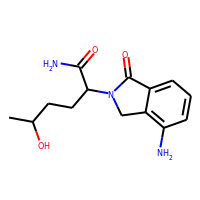
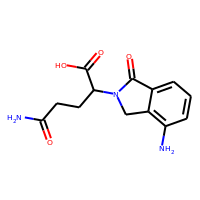
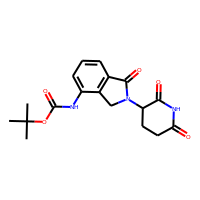
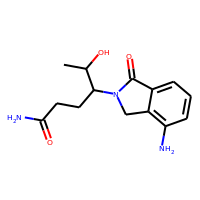
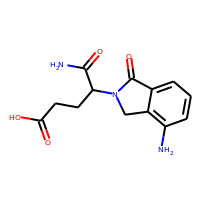

In [5]:
results